In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0042_5centersMedian_1epr30fr_BALANCED_ResNet18')
clog_path = 'experiments/0043_5centersMedian_1epr30fr_BALANCED_ResNet18Client_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'local_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.5170532122915412,
 0.5975877507205993,
 0.6067190653281256,
 0.6123226598317492,
 0.6601395183400626,
 0.6820507383600418,
 0.6902239563951919,
 0.6936038382797467,
 0.6830048229033352,
 0.7035851172954424,
 0.7088740653466414,
 0.7207277485176578,
 0.7376843586355554,
 0.7329894844132123,
 0.7305271240982659,
 0.73723536001947,
 0.7542363524914324,
 0.7414855718954263,
 0.7202838961269136,
 0.7275797303942867,
 0.7358436410702598,
 0.7539913361012776,
 0.7534802210784189,
 0.737953245249545,
 0.7539583337459901,
 0.7522304577999044,
 0.7709527412197321,
 0.7581565805731041,
 0.7574927721900934,
 0.7659004253767041]

In [7]:
inbreast_metrics['local_loss']

{0: [0.44303494691848755],
 1: [0.5871854424476624],
 2: [0.5506454110145569],
 3: [0.5242888331413269],
 4: [0.5992955565452576],
 5: [0.5215224623680115],
 6: [0.5501269698143005],
 7: [0.5560963749885559],
 8: [0.5333075523376465],
 9: [0.4811286926269531],
 10: [0.48301488161087036],
 11: [0.4777638912200928],
 12: [0.4288298785686493],
 13: [0.3847455680370331],
 14: [0.37183094024658203],
 15: [0.38950201869010925],
 16: [0.2887119948863983],
 17: [0.287133127450943],
 18: [0.2669294476509094],
 19: [0.30669209361076355],
 20: [0.23544536530971527],
 21: [0.21893587708473206],
 22: [0.1931958645582199],
 23: [0.20149557292461395],
 24: [0.24088287353515625],
 25: [0.1631263941526413],
 26: [0.16964058578014374],
 27: [0.22957853972911835],
 28: [0.12358696758747101],
 29: [0.20841403305530548],
 30: []}

In [8]:
inbreast_metrics['local_val_loss']

{0: 0.7509500831365585,
 1: 0.6594270318746567,
 2: 0.6516977697610855,
 3: 0.6118499934673309,
 4: 0.6240403801202774,
 5: 0.591878280043602,
 6: 0.5234167352318764,
 7: 0.5282788872718811,
 8: 0.5268435925245285,
 9: 0.5053416416049004,
 10: 0.4590185582637787,
 11: 0.4953688383102417,
 12: 0.391322024166584,
 13: 0.42252516001462936,
 14: 0.4009672999382019,
 15: 0.38362953811883926,
 16: 0.35738053917884827,
 17: 0.36111174523830414,
 18: 0.5277132168412209,
 19: 0.37014197185635567,
 20: 0.37926366180181503,
 21: 0.3332916088402271,
 22: 0.3450874648988247,
 23: 0.36954690515995026,
 24: 0.32505301758646965,
 25: 0.32825513929128647,
 26: 0.3175419643521309,
 27: 0.321627713739872,
 28: 0.2872215248644352,
 29: 0.3049425780773163,
 30: []}

In [9]:
cmmd_metrics['local_loss']

{0: [0.8514212965965271],
 1: [0.8832370042800903],
 2: [0.7931132316589355],
 3: [0.9085568785667419],
 4: [0.9548995494842529],
 5: [0.7976068258285522],
 6: [0.7948290705680847],
 7: [0.8678069114685059],
 8: [0.9640989303588867],
 9: [0.7744299173355103],
 10: [0.739523708820343],
 11: [0.8169676065444946],
 12: [0.698371410369873],
 13: [0.776915431022644],
 14: [0.8688737750053406],
 15: [0.6389510035514832],
 16: [0.6452910900115967],
 17: [0.664728581905365],
 18: [1.3121274709701538],
 19: [0.7673745155334473],
 20: [0.6837902069091797],
 21: [0.6494994759559631],
 22: [0.9896323084831238],
 23: [0.6445968151092529],
 24: [1.2894121408462524],
 25: [0.6012768745422363],
 26: [0.636681079864502],
 27: [0.9213303923606873],
 28: [0.602009654045105],
 29: [0.5226626396179199],
 30: []}

In [10]:
bcdr_metrics['local_val_loss']

{0: 0.7310529947280884,
 1: 0.6212286829948426,
 2: 0.6307783246040344,
 3: 0.5702121675014495,
 4: 0.5320476233959198,
 5: 0.49230056405067446,
 6: 0.48236713409423826,
 7: 0.4877956748008728,
 8: 0.4567422866821289,
 9: 0.4517067313194275,
 10: 0.427100932598114,
 11: 0.41863563656806946,
 12: 0.40423738956451416,
 13: 0.3872440457344055,
 14: 0.38869510740041735,
 15: 0.3894463613629341,
 16: 0.3909578964114189,
 17: 0.3680842861533165,
 18: 0.409229376912117,
 19: 0.42255519777536393,
 20: 0.3914321169257164,
 21: 0.35988302156329155,
 22: 0.3761793404817581,
 23: 0.3713560163974762,
 24: 0.35131122171878815,
 25: 0.4071306698024273,
 26: 0.3723797045648098,
 27: 0.34489317946136,
 28: 0.3885291412472725,
 29: 0.3411626059561968,
 30: []}

In [11]:
cmmd_metrics['LMLD_train_accuracy']

[0.6941309255079007,
 0.6715575620767494,
 0.7065462753950339,
 0.6670428893905191,
 0.6783295711060948,
 0.7161399548532731,
 0.7330699774266366,
 0.7161399548532731,
 0.7020316027088036,
 0.7178329571106095,
 0.7392776523702032,
 0.7330699774266366,
 0.7454853273137697,
 0.708803611738149,
 0.7076749435665914,
 0.7212189616252822,
 0.7426636568848759,
 0.6760722347629797,
 0.6952595936794582,
 0.7161399548532731,
 0.6890519187358917,
 0.7059819413092551,
 0.713882618510158,
 0.7116252821670429,
 0.7110609480812641,
 0.718961625282167,
 0.6879232505643341,
 0.7054176072234764,
 0.7144469525959368,
 0.70372460496614]

In [12]:
cmmd_metrics['LMLD_val_accuracy']

[0.6531531531531531,
 0.6328828828828829,
 0.6644144144144144,
 0.6463963963963963,
 0.6351351351351351,
 0.6779279279279279,
 0.7004504504504504,
 0.6914414414414415,
 0.6666666666666666,
 0.6621621621621622,
 0.7027027027027027,
 0.722972972972973,
 0.7274774774774775,
 0.668918918918919,
 0.6936936936936937,
 0.7117117117117117,
 0.722972972972973,
 0.6779279279279279,
 0.6756756756756757,
 0.713963963963964,
 0.713963963963964,
 0.6756756756756757,
 0.7072072072072072,
 0.7184684684684685,
 0.7094594594594594,
 0.7184684684684685,
 0.6959459459459459,
 0.6824324324324325,
 0.7274774774774775,
 0.713963963963964]

## Curve

In [13]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[0.8514212965965271,
 0.8832370042800903,
 0.7931132316589355,
 0.9085568785667419,
 0.9548995494842529,
 0.7976068258285522,
 0.7948290705680847,
 0.8678069114685059,
 0.9640989303588867,
 0.7744299173355103,
 0.739523708820343,
 0.8169676065444946,
 0.698371410369873,
 0.776915431022644,
 0.8688737750053406,
 0.6389510035514832,
 0.6452910900115967,
 0.664728581905365,
 1.3121274709701538,
 0.7673745155334473,
 0.6837902069091797,
 0.6494994759559631,
 0.9896323084831238,
 0.6445968151092529,
 1.2894121408462524,
 0.6012768745422363,
 0.636681079864502,
 0.9213303923606873,
 0.602009654045105,
 0.5226626396179199]

In [14]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

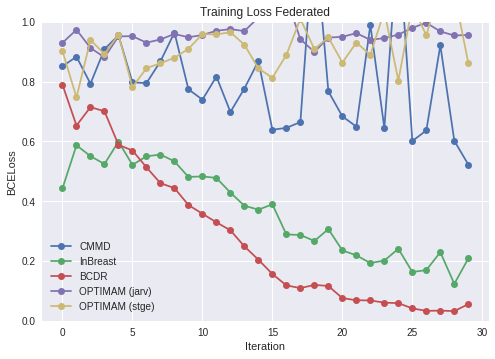

In [15]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_MEDIAN.png')

In [16]:
cmmd_metrics['local_val_loss']

{0: 0.6925707048839993,
 1: 0.6585438198513455,
 2: 0.6541998002264234,
 3: 0.648699387576845,
 4: 0.633535768588384,
 5: 0.6285219543510013,
 6: 0.6142073028617435,
 7: 0.5930118249522315,
 8: 0.5907360235850017,
 9: 0.5817838675445981,
 10: 0.5744067668914795,
 11: 0.5608846094873217,
 12: 0.5559620473119947,
 13: 0.5434345930814743,
 14: 0.5356652385658688,
 15: 0.5349177410205205,
 16: 0.5233970804346932,
 17: 0.511771121289995,
 18: 0.5135102798541387,
 19: 0.5055827862686582,
 20: 0.5060317718320423,
 21: 0.5084520962503222,
 22: 0.4984374201960034,
 23: 0.504716807934973,
 24: 0.5017271286911434,
 25: 0.4872842272122701,
 26: 0.48925179607338376,
 27: 0.47453087667624155,
 28: 0.48051385945743985,
 29: 0.47195044060548147,
 30: []}

In [17]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [18]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

[0.6925707048839993,
 0.6585438198513455,
 0.6541998002264234,
 0.648699387576845,
 0.633535768588384,
 0.6285219543510013,
 0.6142073028617435,
 0.5930118249522315,
 0.5907360235850017,
 0.5817838675445981,
 0.5744067668914795,
 0.5608846094873217,
 0.5559620473119947,
 0.5434345930814743,
 0.5356652385658688,
 0.5349177410205205,
 0.5233970804346932,
 0.511771121289995,
 0.5135102798541387,
 0.5055827862686582,
 0.5060317718320423,
 0.5084520962503222,
 0.4984374201960034,
 0.504716807934973,
 0.5017271286911434,
 0.4872842272122701,
 0.48925179607338376,
 0.47453087667624155,
 0.48051385945743985,
 0.47195044060548147]

In [19]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

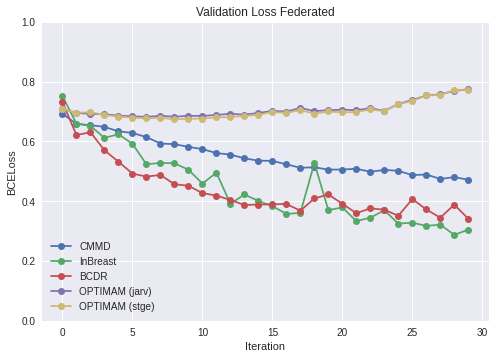

In [20]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN.png')

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

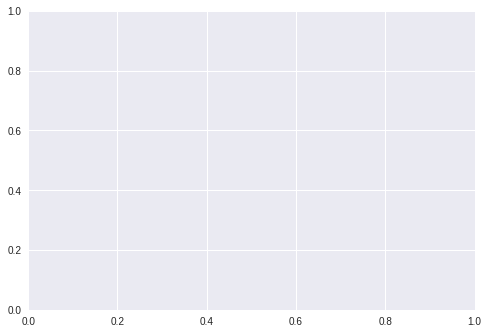

In [21]:
plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [22]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [24]:
cmmd_f1

[0.5340050377833753,
 0.5771144278606966,
 0.5743589743589743,
 0.585,
 0.6127450980392157,
 0.6270022883295194,
 0.6420323325635104,
 0.6862302483069977,
 0.6635294117647059,
 0.6827133479212254,
 0.6850574712643678,
 0.7013574660633484,
 0.7133182844243793,
 0.7223476297968398,
 0.7172413793103448,
 0.7149321266968326,
 0.7427293064876958,
 0.724373576309795,
 0.7427293064876958,
 0.7472035794183445,
 0.75,
 0.7549668874172185,
 0.7688984881209503,
 0.7735042735042735,
 0.7733333333333333,
 0.7787610619469026,
 0.7857142857142857,
 0.775330396475771,
 0.774617067833698,
 0.7837837837837838]

In [25]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]

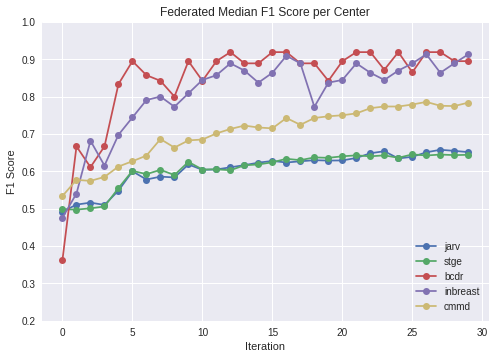

In [30]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('Federated Median F1 Score per Center')
plt.savefig('./plots/FMedian_F1.png')

In [33]:
bcdr_f1

[0.36363636363636365,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.8333333333333334,
 0.8947368421052632,
 0.8571428571428571,
 0.8421052631578947,
 0.8,
 0.8947368421052632,
 0.8421052631578947,
 0.8947368421052632,
 0.918918918918919,
 0.8888888888888888,
 0.8888888888888888,
 0.918918918918919,
 0.918918918918919,
 0.8888888888888888,
 0.8888888888888888,
 0.8421052631578947,
 0.8947368421052632,
 0.918918918918919,
 0.918918918918919,
 0.8717948717948718,
 0.918918918918919,
 0.8648648648648649,
 0.918918918918919,
 0.918918918918919,
 0.8947368421052632,
 0.8947368421052632]

In [28]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]


In [29]:
inbreast_accuracy

[0.43478260869565216,
 0.43478260869565216,
 0.6521739130434783,
 0.5217391304347826,
 0.6521739130434783,
 0.6956521739130435,
 0.7391304347826086,
 0.782608695652174,
 0.7391304347826086,
 0.8260869565217391,
 0.8260869565217391,
 0.9130434782608695,
 0.8695652173913043,
 0.8695652173913043,
 0.782608695652174,
 0.8260869565217391,
 0.8695652173913043,
 0.8695652173913043,
 0.7391304347826086,
 0.782608695652174,
 0.8260869565217391,
 0.8695652173913043,
 0.8260869565217391,
 0.8260869565217391,
 0.8695652173913043,
 0.8695652173913043,
 0.9130434782608695,
 0.8260869565217391,
 0.8695652173913043,
 0.9130434782608695]